<a href="https://colab.research.google.com/github/AhmadIsmail83N/MyData/blob/master/Lab5_MMO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Подключим все необходимые библиотеки и настроим отображение графиков [2,3]

In [0]:
from datetime import datetime
import graphviz
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import NuSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz, plot_tree
# Enable inline plots
%matplotlib inline
# Set plots formats to save high resolution PNG
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")


Зададим ширину текстового представления данных, чтобы в дальнейшем текст в отчёте влезал на *А4* 



In [0]:
pd.set_option("display.width", 70)

**3.1. Предварительная подготовка данных**

В качестве набора данных используются метрологические данные MapData-Evans-GP.csv  "Mars"

In [0]:
data = pd.read_csv("/content/sample_data/MapData-Evans-GP.csv", skiprows=range(1, 45000))

In [4]:
data.dtypes

Latitude °               int64
Latitude                object
Longitude °              int64
Longitude               object
Topography              object
Difficulty Challenge     int64
Altitude                 int64
Temperature              int64
Metals                   int64
Rare Metals              int64
Concrete                 int64
Water                    int64
Dust Devils              int64
Dust Storms              int64
Meteors                  int64
Cold Waves               int64
Map Name                object
Named Location          object
Breakthrough 1          object
Breakthrough 2          object
Breakthrough 3          object
Breakthrough 4          object
Breakthrough 5          object
Breakthrough 6          object
Breakthrough 7          object
Breakthrough 8          object
Breakthrough 9          object
Breakthrough 10         object
Breakthrough 11         object
Breakthrough 12         object
Breakthrough 13         object
Breakthrough 14         object
Breakthr

Посмотрим на данные в данном наборе данных:

In [5]:
data.head()

,Latitude °,Latitude,Longitude °,Longitude,Topography,Difficulty Challenge,Altitude,Temperature,Metals,Rare Metals,Concrete,Water,Dust Devils,Dust Storms,Meteors,Cold Waves,Map Name,Named Location,Breakthrough 1,Breakthrough 2,Breakthrough 3,Breakthrough 4,Breakthrough 5,Breakthrough 6,Breakthrough 7,Breakthrough 8,Breakthrough 9,Breakthrough 10,Breakthrough 11,Breakthrough 12,Breakthrough 13,Breakthrough 14,Breakthrough 15,Breakthrough 16,Breakthrough 17
0,62,N,149,E,Relatively Flat,140,-3930,-86,2,2,3,1,1,2,1,4,BlankBigCliffsCMix_02,Arcadia Planitia,Dry Farming,Superconducting Computing,Plutonium Synthesis,Advanced Drone Drive,Neural Empathy,Core Metals,Zero-Space Computing,Overcharge Amplifications,Cryo-sleep,Vocation-Oriented Society,Wireless Power,Autonomous Hubs,Magnetic Extraction,Safe Mode,Extractor AI,Superior Cables,Construction Nanites
1,62,N,149,W,Relatively Flat,140,-3584,-86,1,1,1,1,1,2,1,4,BlankBigTerraceCMix_17,NaN,Soylent Green,Printed Electronics,Eternal Fusion,Inspiring Architecture,Dome Streamlining,Safe Mode,Hive Mind,Autonomous Hubs,Advanced Drone Drive,Landscaping Nanites,Extractor AI,Superconducting Computing,Factory Automation,Plasma Rocket,Construction Nanites,Martianborn Ingenuity,Martian Diet
2,62,S,150,E,Relatively Flat,100,1956,-15,2,2,2,2,2,1,3,1,BlankBig_04,NaN,Neural Empathy,Wireless Power,Artificial Muscles,Superior Pipes,Dry Farming,Safe Mode,Printed Electronics,Sustained Workload,Superfungus,Zero-Space Computing,Core Water,Eternal Fusion,Factory Automation,Landscaping Nanites,Alien Imprints,Resilient Vegetation,Hive Mind
3,62,S,150,W,Relatively Flat,100,-6,-29,2,2,1,2,2,2,2,2,BlankBig_03,Terra Sireum,Martian Diet,Artificial Muscles,Cryo-sleep,Magnetic Extraction,Nocturnal Adaptation,Gem Architecture,Ancient Terraforming Device,Autonomous Hubs,Space Rehabilitation,Core Water,Core Metals,Neo-Concrete,Dry Farming,Superior Pipes,Giant Crops,Sustained Workload,Resilient Vegetation
4,62,N,150,E,Relatively Flat,140,-4045,-86,2,2,3,1,1,2,1,4,BlankBigTerraceCMix_03,Arcadia Planitia,Zero-Space Computing,Ancient Terraforming Device,Martianborn Ingenuity,Nocturnal Adaptation,Factory Automation,Inspiring Architecture,Martian Steel,The Positronic Brain,Hull Polarization,Dry Farming,Cryo-sleep,Artificial Muscles,Neo-Concrete,Superior Pipes,Overcharge Amplifications,Core Metals,Gene Selection


Convert Temperature (° F)   to Temperature (C)  

In [0]:
def TempreatureCToF(t):
  return t*9/5 +32

In [7]:
df = data.copy()
df["Tempreature(F)"]=TempreatureCToF(df["Temperature"])
df.head()

,Latitude °,Latitude,Longitude °,Longitude,Topography,Difficulty Challenge,Altitude,Temperature,Metals,Rare Metals,Concrete,Water,Dust Devils,Dust Storms,Meteors,Cold Waves,Map Name,Named Location,Breakthrough 1,Breakthrough 2,Breakthrough 3,Breakthrough 4,Breakthrough 5,Breakthrough 6,Breakthrough 7,Breakthrough 8,Breakthrough 9,Breakthrough 10,Breakthrough 11,Breakthrough 12,Breakthrough 13,Breakthrough 14,Breakthrough 15,Breakthrough 16,Breakthrough 17,Tempreature(F)
0,62,N,149,E,Relatively Flat,140,-3930,-86,2,2,3,1,1,2,1,4,BlankBigCliffsCMix_02,Arcadia Planitia,Dry Farming,Superconducting Computing,Plutonium Synthesis,Advanced Drone Drive,Neural Empathy,Core Metals,Zero-Space Computing,Overcharge Amplifications,Cryo-sleep,Vocation-Oriented Society,Wireless Power,Autonomous Hubs,Magnetic Extraction,Safe Mode,Extractor AI,Superior Cables,Construction Nanites,-122.8
1,62,N,149,W,Relatively Flat,140,-3584,-86,1,1,1,1,1,2,1,4,BlankBigTerraceCMix_17,NaN,Soylent Green,Printed Electronics,Eternal Fusion,Inspiring Architecture,Dome Streamlining,Safe Mode,Hive Mind,Autonomous Hubs,Advanced Drone Drive,Landscaping Nanites,Extractor AI,Superconducting Computing,Factory Automation,Plasma Rocket,Construction Nanites,Martianborn Ingenuity,Martian Diet,-122.8
2,62,S,150,E,Relatively Flat,100,1956,-15,2,2,2,2,2,1,3,1,BlankBig_04,NaN,Neural Empathy,Wireless Power,Artificial Muscles,Superior Pipes,Dry Farming,Safe Mode,Printed Electronics,Sustained Workload,Superfungus,Zero-Space Computing,Core Water,Eternal Fusion,Factory Automation,Landscaping Nanites,Alien Imprints,Resilient Vegetation,Hive Mind,5.0
3,62,S,150,W,Relatively Flat,100,-6,-29,2,2,1,2,2,2,2,2,BlankBig_03,Terra Sireum,Martian Diet,Artificial Muscles,Cryo-sleep,Magnetic Extraction,Nocturnal Adaptation,Gem Architecture,Ancient Terraforming Device,Autonomous Hubs,Space Rehabilitation,Core Water,Core Metals,Neo-Concrete,Dry Farming,Superior Pipes,Giant Crops,Sustained Workload,Resilient Vegetation,-20.2
4,62,N,150,E,Relatively Flat,140,-4045,-86,2,2,3,1,1,2,1,4,BlankBigTerraceCMix_03,Arcadia Planitia,Zero-Space Computing,Ancient Terraforming Device,Martianborn Ingenuity,Nocturnal Adaptation,Factory Automation,Inspiring Architecture,Martian Steel,The Positronic Brain,Hull Polarization,Dry Farming,Cryo-sleep,Artificial Muscles,Neo-Concrete,Superior Pipes,Overcharge Amplifications,Core Metals,Gene Selection,-122.8


In [8]:
df.dtypes

Latitude °                int64
Latitude                 object
Longitude °               int64
Longitude                object
Topography               object
Difficulty Challenge      int64
Altitude                  int64
Temperature               int64
Metals                    int64
Rare Metals               int64
Concrete                  int64
Water                     int64
Dust Devils               int64
Dust Storms               int64
Meteors                   int64
Cold Waves                int64
Map Name                 object
Named Location           object
Breakthrough 1           object
Breakthrough 2           object
Breakthrough 3           object
Breakthrough 4           object
Breakthrough 5           object
Breakthrough 6           object
Breakthrough 7           object
Breakthrough 8           object
Breakthrough 9           object
Breakthrough 10          object
Breakthrough 11          object
Breakthrough 12          object
Breakthrough 13          object
Breakthr

С такими данными уже можно работать. Проверим размер набора данных:

In [9]:
df.shape

(5902, 36)

Проверим основные статистические характеристики набора данных:

In [10]:
df.describe()

,Latitude °,Longitude °,Difficulty Challenge,Altitude,Temperature,Metals,Rare Metals,Concrete,Water,Dust Devils,Dust Storms,Meteors,Cold Waves,Tempreature(F)
count,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000
mean,66.403931,91.839715,130.437140,-1230.519993,-58.817350,1.998645,1.998645,1.575737,1.420535,1.509997,2.293799,1.667740,3.018638,-73.871230
std,2.358377,52.680989,32.840636,2918.629314,30.374149,0.721283,0.721283,0.929077,0.562367,0.520534,0.951150,0.774907,1.153522,54.673467
min,62.000000,0.000000,100.000000,-7392.000000,-100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-148.000000
25%,64.000000,46.000000,100.000000,-4045.000000,-86.000000,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,-122.800000
50%,66.000000,92.000000,140.000000,-3007.000000,-75.500000,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,4.000000,-103.900000
75%,68.000000,138.000000,140.000000,1610.000000,-29.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,4.000000,-20.200000
max,70.000000,180.000000,220.000000,3572.000000,-1.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,30.200000


Проверим наличие пропусков в данных:

In [11]:
df.isnull().sum()

Latitude °                 0
Latitude                   0
Longitude °                0
Longitude                  0
Topography                 0
Difficulty Challenge       0
Altitude                   0
Temperature                0
Metals                     0
Rare Metals                0
Concrete                   0
Water                      0
Dust Devils                0
Dust Storms                0
Meteors                    0
Cold Waves                 0
Map Name                   0
Named Location          5065
Breakthrough 1             0
Breakthrough 2             0
Breakthrough 3             0
Breakthrough 4             0
Breakthrough 5             0
Breakthrough 6             0
Breakthrough 7             0
Breakthrough 8             0
Breakthrough 9             0
Breakthrough 10            0
Breakthrough 11            0
Breakthrough 12            0
Breakthrough 13            0
Breakthrough 14            0
Breakthrough 15            0
Breakthrough 16            0
Breakthrough 1

**3.2. Разделение данных**

Разделим данные на целевой столбец и признаки:

In [12]:
df.dtypes

Latitude °                int64
Latitude                 object
Longitude °               int64
Longitude                object
Topography               object
Difficulty Challenge      int64
Altitude                  int64
Temperature               int64
Metals                    int64
Rare Metals               int64
Concrete                  int64
Water                     int64
Dust Devils               int64
Dust Storms               int64
Meteors                   int64
Cold Waves                int64
Map Name                 object
Named Location           object
Breakthrough 1           object
Breakthrough 2           object
Breakthrough 3           object
Breakthrough 4           object
Breakthrough 5           object
Breakthrough 6           object
Breakthrough 7           object
Breakthrough 8           object
Breakthrough 9           object
Breakthrough 10          object
Breakthrough 11          object
Breakthrough 12          object
Breakthrough 13          object
Breakthr

In [0]:
 X = df.drop(["Difficulty Challenge","Dust Devils","Latitude","Longitude","Topography","Map Name",
              "Named Location","Breakthrough 1","Meteors","Cold Waves","Concrete","Tempreature(F)","Temperature",
              "Breakthrough 2","Breakthrough 3","Breakthrough 4","Breakthrough 5","Breakthrough 6",
              "Breakthrough 7","Breakthrough 8","Breakthrough 9","Breakthrough 10","Breakthrough 11",
              "Breakthrough 12","Breakthrough 13","Breakthrough 14","Breakthrough 15","Breakthrough 16",
              "Breakthrough 17","Dust Storms","Altitude"               
              ],axis=1)
 
y = df["Tempreature(F)"]

In [14]:
print(X.head(), "\n")
print(y.head())

   Latitude °  Longitude °  Metals  Rare Metals  Water
0          62          149       2            2      1
1          62          149       1            1      1
2          62          150       2            2      2
3          62          150       2            2      2
4          62          150       2            2      1 

0   -122.8
1   -122.8
2      5.0
3    -20.2
4   -122.8
Name: Tempreature(F), dtype: float64


In [15]:
 print(X.shape)
print(y.shape)

(5902, 5)
(5902,)


In [16]:
X.head()

,Latitude °,Longitude °,Metals,Rare Metals,Water
0,62,149,2,2,1
1,62,149,1,1,1
2,62,150,2,2,2
3,62,150,2,2,2
4,62,150,2,2,1


Предобработаем данные, чтобы методы работали лучше:

In [17]:
columns = X.columns
scaler = StandardScaler()
X = scaler.fit_transform(X)
pd.DataFrame(X, columns=columns).describe()


,Latitude °,Longitude °,Metals,Rare Metals,Water
count,5.902000e+03,5.902000e+03,5.902000e+03,5.902000e+03,5.902000e+03
mean,-2.600119e-14,1.191110e-16,-5.149012e-15,-5.149012e-15,1.096555e-14
std,1.000085e+00,1.000085e+00,1.000085e+00,1.000085e+00,1.000085e+00
min,-1.867515e+00,-1.743466e+00,-1.384657e+00,-1.384657e+00,-7.478585e-01
25%,-1.019402e+00,-8.702114e-01,1.879412e-03,1.879412e-03,-7.478585e-01
50%,-1.712894e-01,3.042810e-03,1.879412e-03,1.879412e-03,-7.478585e-01
75%,6.768232e-01,8.762971e-01,1.879412e-03,1.879412e-03,1.030490e+00
max,1.524936e+00,1.673616e+00,2.774952e+00,2.774952e+00,2.808839e+00


Разделим выборку на тренировочную и тестовую:

In [0]:
 X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.25, random_state=346705925)

In [19]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4426, 5)
(1476, 5)
(4426,)
(1476,)


3.3. Обучение моделей
 

Напишем функцию, которая считает метрики построенной модели:

In [0]:
def test_model(model):
  print("mean_absolute_error:",
  mean_absolute_error(y_test, model.predict(X_test)))
  print("median_absolute_error:",
  median_absolute_error(y_test, model.predict(X_test)))
  print("r2_score:",
  r2_score(y_test, model.predict(X_test)))

**3.3.1. Линейная модель — Lasso**

Попробуем метод Lasso с гиперпараметром α = 1:

In [21]:
las_1 = Lasso(alpha=1.0)
las_1.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Проверим метрики построенной модели:

In [22]:
test_model(las_1)

mean_absolute_error: 33.56500876615629
median_absolute_error: 29.263956903936844
r2_score: 0.4130105390714782


**3.3.2. SVM**

Попробуем метод NuSVR с гиперпараметром ν = 0,5

In [23]:
nusvr_05 = NuSVR(nu=0.5, gamma='scale')
nusvr_05.fit(X_train, y_train)

NuSVR(C=1.0, cache_size=200, coef0=0.0, degree=3, gamma='scale', kernel='rbf',
      max_iter=-1, nu=0.5, shrinking=True, tol=0.001, verbose=False)

In [24]:
test_model(nusvr_05)

mean_absolute_error: 34.45506333786936
median_absolute_error: 27.551732963554862
r2_score: 0.45797091648303156


**3.3.3. Дерево решений**

In [25]:
dt_none = DecisionTreeRegressor(max_depth=None)
dt_none.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [26]:
test_model(dt_none)

mean_absolute_error: 29.566056910569124
median_absolute_error: 1.1368683772161603e-13
r2_score: 0.04728409388624588


In [0]:
def stat_tree(estimator):
  n_nodes = estimator.tree_.node_count
  children_left = estimator.tree_.children_left
  children_right = estimator.tree_.children_right
  node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
  is_leaves = np.zeros(shape=n_nodes, dtype=bool)
  stack = [(0, -1)] # seed is the root node id and its parent depth
  while len(stack) > 0:
    node_id, parent_depth = stack.pop()
    node_depth[node_id] = parent_depth + 1
    # If we have a test node
    if (children_left[node_id] != children_right[node_id]):
      stack.append((children_left[node_id], parent_depth + 1))
      stack.append((children_right[node_id], parent_depth + 1))
    else:
      is_leaves[node_id] = True
  print("Всего узлов:", n_nodes)
  print("Листовых узлов:", sum(is_leaves))
  print("Глубина дерева:", max(node_depth))
  print("Минимальная глубина листьев дерева:",min(node_depth[is_leaves]))
  print("Средняя глубина листьев дерева:", node_depth[is_leaves].mean())

In [28]:
stat_tree(dt_none)

Всего узлов: 2855
Листовых узлов: 1428
Глубина дерева: 23
Минимальная глубина листьев дерева: 3
Средняя глубина листьев дерева: 13.707983193277311


**3.4. Подбор гиперпараметра K**

3.4.1. Линейная модель — Lasso

In [29]:
param_range = np.arange(0.001, 2.01, 0.1)
tuned_parameters = [{'alpha': param_range}]
tuned_parameters

[{'alpha': array([1.000e-03, 1.010e-01, 2.010e-01, 3.010e-01, 4.010e-01, 5.010e-01,
         6.010e-01, 7.010e-01, 8.010e-01, 9.010e-01, 1.001e+00, 1.101e+00,
         1.201e+00, 1.301e+00, 1.401e+00, 1.501e+00, 1.601e+00, 1.701e+00,
         1.801e+00, 1.901e+00, 2.001e+00])}]

In [30]:
gs = GridSearchCV(Lasso(),
                  tuned_parameters,
                  cv=ShuffleSplit(n_splits=10), 
                   scoring="r2",
                  return_train_score=True,
                  n_jobs=-1
                  )
gs.fit(X, y)
gs.best_estimator_

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

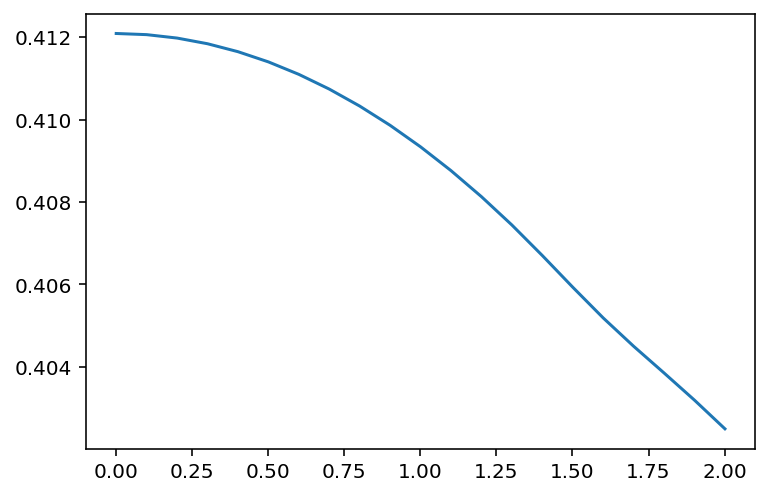

In [31]:
plt.plot(param_range, gs.cv_results_["mean_train_score"]);

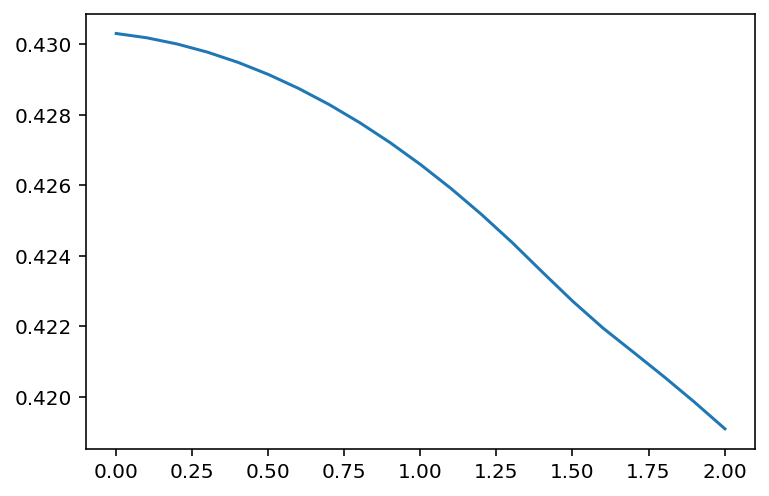

In [32]:
plt.plot(param_range, gs.cv_results_["mean_test_score"]);

In [33]:
reg = LinearRegression()
reg.fit(X_train, y_train)
test_model(reg)

mean_absolute_error: 32.752793915800765
median_absolute_error: 27.574994132557105
r2_score: 0.41623164225511244


**3.4.2. SVM**

In [34]:
param_range = np.arange(0.1, 1.01, 0.1)
tuned_parameters = [{'nu': param_range}]
tuned_parameters

[{'nu': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])}]

In [35]:
gs = GridSearchCV(
                NuSVR(gamma='scale'),
                tuned_parameters,
                cv=ShuffleSplit(n_splits=10),
                scoring="r2",
                return_train_score=True, 
                n_jobs=-1
                )
gs.fit(X, y)
gs.best_estimator_

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


NuSVR(C=1.0, cache_size=200, coef0=0.0, degree=3, gamma='scale', kernel='rbf',
      max_iter=-1, nu=0.6, shrinking=True, tol=0.001, verbose=False)

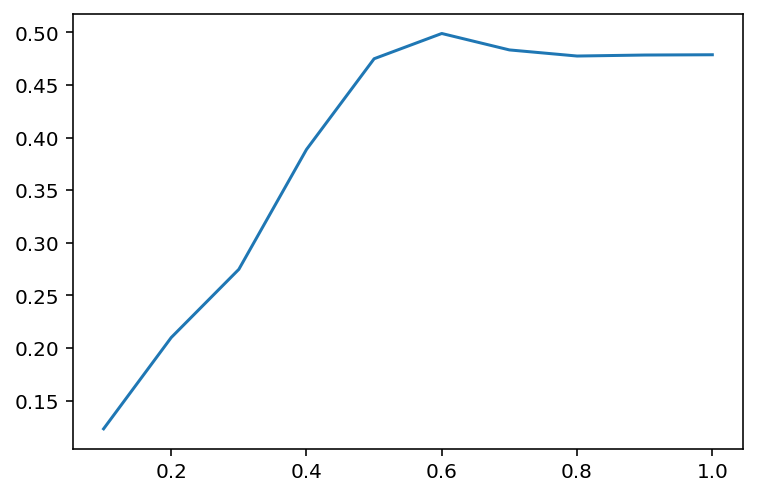

In [36]:
plt.plot(param_range, gs.cv_results_["mean_train_score"]);

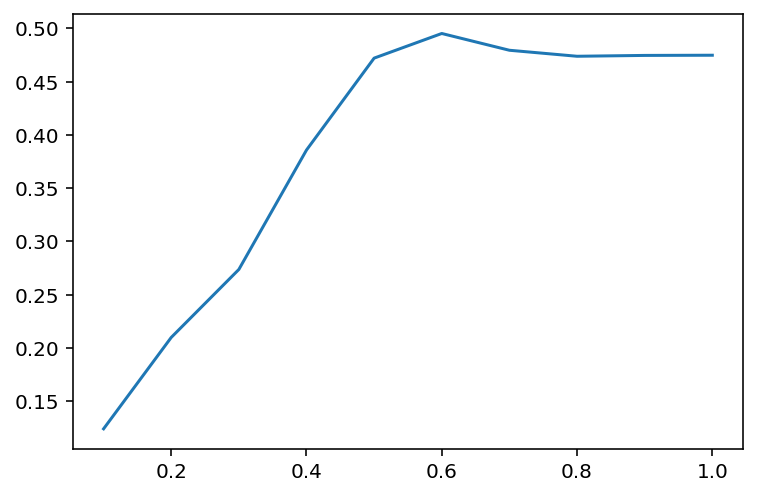

In [37]:
plt.plot(param_range, gs.cv_results_["mean_test_score"]);

**3.4.3. Дерево решений**

In [38]:
param_range = np.arange(1, 51, 2)
tuned_parameters = [{'max_depth': param_range}]
tuned_parameters

[{'max_depth': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
         35, 37, 39, 41, 43, 45, 47, 49])}]

In [39]:
gs = GridSearchCV(DecisionTreeRegressor(), tuned_parameters,
cv=ShuffleSplit(n_splits=10), scoring="r2",
return_train_score=True, n_jobs=-1)
gs.fit(X, y)
gs.best_estimator_

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=9,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

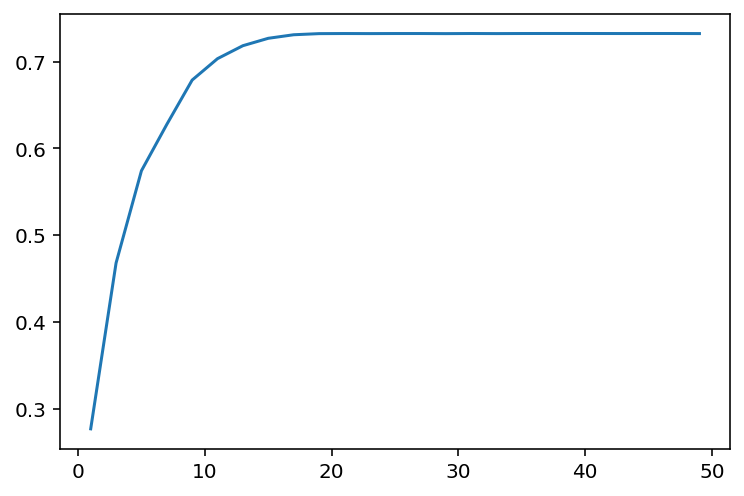

In [40]:
plt.plot(param_range, gs.cv_results_["mean_train_score"]);

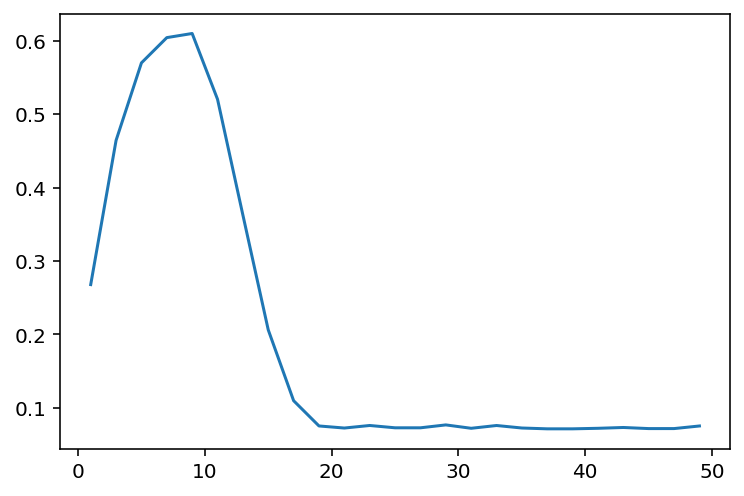

In [41]:
plt.plot(param_range, gs.cv_results_["mean_test_score"]);

In [42]:
param_range = np.arange(7, 14, 1)
tuned_parameters = [{'max_depth': param_range}]
tuned_parameters

[{'max_depth': array([ 7,  8,  9, 10, 11, 12, 13])}]

In [43]:
gs = GridSearchCV(DecisionTreeRegressor(), tuned_parameters,
cv=ShuffleSplit(n_splits=10), scoring="r2",
return_train_score=True, n_jobs=-1)
gs.fit(X, y)
gs.best_estimator_

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=9,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

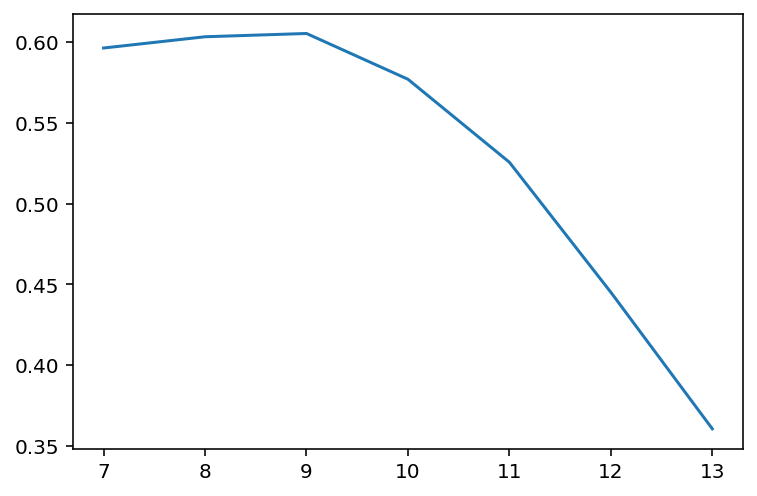

In [44]:
plt.plot(param_range, gs.cv_results_["mean_test_score"]);

In [45]:
reg = gs.best_estimator_
reg.fit(X_train, y_train)
test_model(reg)

mean_absolute_error: 20.696108274007745
median_absolute_error: 5.178529411764696
r2_score: 0.606824686916886


In [46]:
stat_tree(reg)

Всего узлов: 505
Листовых узлов: 253
Глубина дерева: 9
Минимальная глубина листьев дерева: 3
Средняя глубина листьев дерева: 8.545454545454545


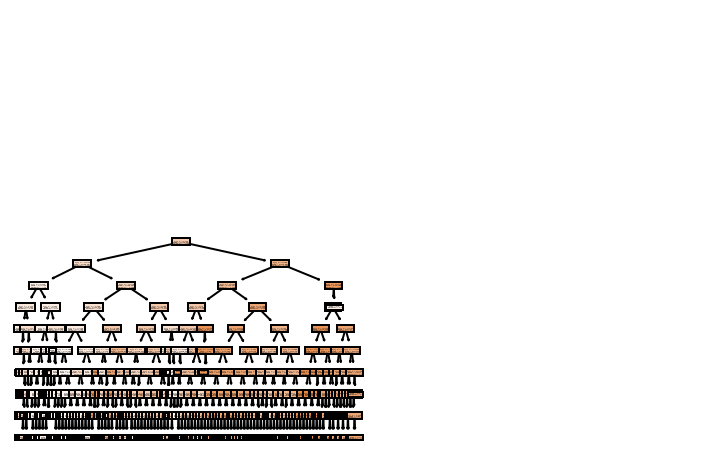

In [47]:
plot_tree(reg, filled=True);

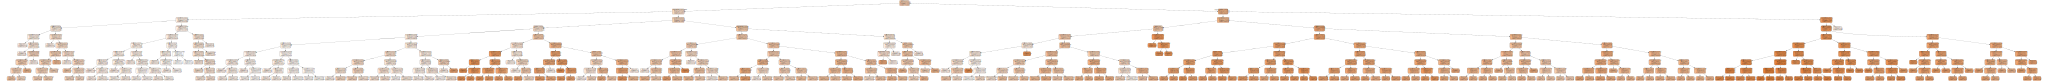

In [48]:
dot_data = export_graphviz(reg, out_file=None, feature_names=columns,
filled=True, rounded=True,
special_characters=True)
graph = graphviz.Source(dot_data)
graph